In [11]:
# Install semua library yang dibutuhkan: numpy, matplotlib, pandas, mgwr, geopandas dan libpysal
# Gunakan perintah: pip install libpysal (sebagai contoh)
import numpy as np
import libpysal as ps
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import geopandas as gp
import os

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [12]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [15]:
datacw=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/landslides.csv')

In [16]:
datacw.head()

,UserID,X,Y,Elev,Slope,SinAspct,CosAspct,AbsSouth,Landslid,DistStrm
0,1,616168.5625,5201076.5,1450.475,27.44172,0.409126,-0.912478,24.1499,1,8.506
1,2,624923.8125,5201008.5,1567.476,21.88343,-0.919245,-0.393685,66.8160,1,15.561
2,3,615672.0000,5199187.5,1515.065,38.81030,-0.535024,-0.844837,32.3455,1,41.238
3,4,615209.3125,5199112.0,1459.827,26.71631,-0.828548,-0.559918,55.9499,1,17.539
4,5,616354.6875,5198945.5,1379.442,27.55271,-0.872281,-0.489005,60.7248,1,35.023


In [19]:
shp=gp.read_file('/content/drive/MyDrive/Colab Notebooks/clearwater/quads.shp')

<Axes: >

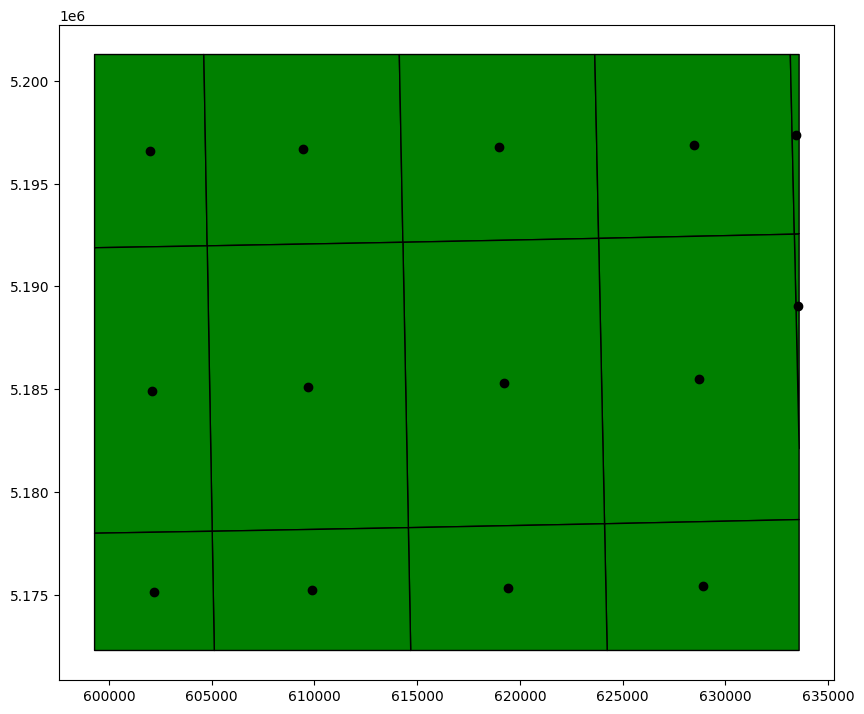

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
shp.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'green'})
shp.centroid.plot(ax=ax, c='black')

In [25]:
# Tentukan variabel bebas dan terikatnya
d_y = dataku['Landslid'].values.reshape((-1,1))
d_X = dataku[['Elev', 'Slope']].values
# Tentukan Latitude dan Longitude
u = dataku['X']
v = dataku['Y']
d_coords = list(zip(u,v))

d_X = (d_X - d_X.mean(axis=0)) / d_X.std(axis=0)

d_y = d_y.reshape((-1,1))

d_y = (d_y - d_y.mean(axis=0)) / d_y.std(axis=0)

In [26]:
# Kalibrate GWR model
gwr_selector = Sel_BW(d_coords, d_y, d_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(d_coords, d_y, d_X, gwr_bw).fit()

96.0


In [27]:
gwr_results.params[0:5]

array([[ 0.19811275, -0.17504834,  0.09145796],
       [ 0.23597657, -0.17344213,  0.0617439 ],
       [ 0.19173748, -0.15576904,  0.10169045],
       [ 0.18293709, -0.16430895,  0.10613757],
       [ 0.20429373, -0.13814613,  0.09577177]])

In [28]:
gwr_results.localR2[0:10]

array([[0.1070806 ],
       [0.08799355],
       [0.10164755],
       [0.10824563],
       [0.09021811],
       [0.11683968],
       [0.07083936],
       [0.07500741],
       [0.07567138],
       [0.07667804]])

In [29]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 239
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            190.641
Log-likelihood:                                                    -312.111
AIC:                                                                630.221
AICc:                                                               632.392
BIC:                                                              -1101.805
R2:                                                                   0.202
Adj. R2:                                                              0.196

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------